In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import csv

In [3]:
path_oscliador = os.path.join('..','series-temporales-machine-learning','Data','acelerometro')
if os.path.isdir(path_oscliador):
    print("Path correcto")
else:
    print("Path Incorrecto")

Path correcto


In [4]:
# leyendo un archivo separado por punto-comas con csv.reader()
#wiht open cierra automaticamente
my_file = 'oscilador.csv'
with open(os.path.join(path_oscliador, my_file), 'r') as fp: # handler del archivo
    print(f'leyendo el archivo "{my_file}"...')
    reader = csv.reader(fp, delimiter=';') # creamos el objeto que leera el archivo linea por linea
    data = [] # guardaremos cada linea en una lista
    for row in reader: # recorremos cada linea
        data.append(row) # agregamos cada linea

data[:10] #muestro las diez primeras filas

leyendo el archivo "oscilador.csv"...


[['time', 'gFx', 'gFy', 'gFz', 'TgF'],
 ['0.002158646', '-0.1833', '0.0550', '0.8568', '0.878'],
 ['0.002741094', '-0.1860', '0.0557', '0.8614', '0.883'],
 ['0.003026511', '-0.1889', '0.0606', '0.8651', '0.888'],
 ['0.003287084', '-0.1941', '0.0636', '0.8687', '0.892'],
 ['0.003548542', '-0.1980', '0.0682', '0.8758', '0.900'],
 ['0.003801094', '-0.2039', '0.0733', '0.8829', '0.909'],
 ['0.006302813', '-0.2107', '0.0775', '0.8925', '0.920'],
 ['0.007235001', '-0.2202', '0.0809', '0.9022', '0.932'],
 ['0.01161948', '-0.2288', '0.0855', '0.9125', '0.945']]

Obs: Notemos que el objeto ```Data``` es de tipo *list*. Es una lista de lista, es decir es una lista que contiene varias listas filas, y dentro de estas listas filas estan los datos de mi archivo. ```Data[0][1]``` estoy accediendo la primera fila y al segundo elemento de esa lista. En este caso, en la lista de lista ```Data[a][b]```, $a$ corresponde a la fila. y $b$ corresponde a la posicón del elemento de dicha fila.

## Ordeno lo datos

In [68]:
col_names = data[0]
#conveierto la lista en un array, obviando el encabezado
valores = np.array(data[1:], dtype=np.float64) #Convierto los elementos string en flotantes con dtype
tiempo = valores[:,0] #datos del tiempo
fuerza_tot = valores[:,4]

## Gráfica de datos

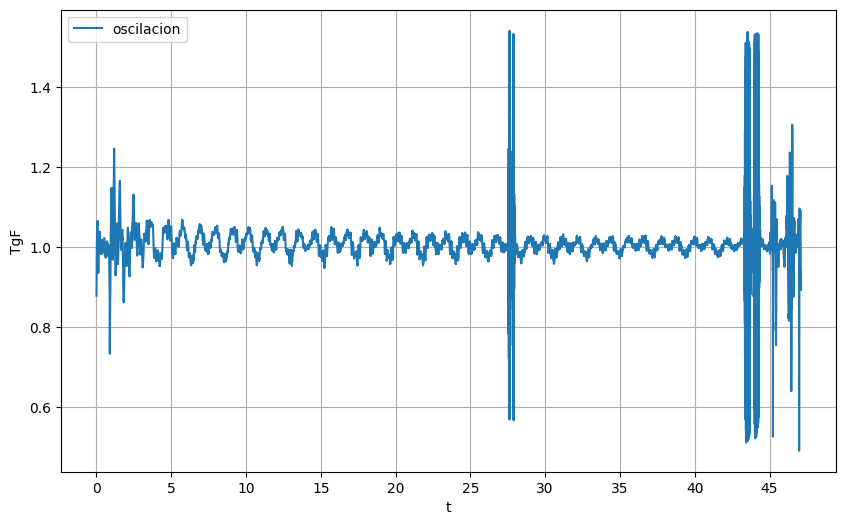

In [69]:
fig = plt.figure(figsize=(10,6)) #creo un objeto figura
ax = fig.add_subplot(111) #creo un subplot de 1x1
ax.plot(tiempo,fuerza_tot, label="Datos")
ax.set_xlabel("t")
ax.set_ylabel("TgF")
ax.set_xticks(np.arange(0, 50, 5)) #agrego mas subdivisiones a lo pantalla
ax.legend()
ax.grid()

## Aplico Mask

In [78]:
#acoto el rango de valores en donde la oscilación sea mas estable.
tiempo_mask= (tiempo  > 5) & (tiempo < 25) #tengo la mascara

# aplico la mascara sobre el timepo y la fuerza total.
tiempo_lim = tiempo[tiempo_mask]
fuerza_tot_lim =fuerza_tot[tiempo_mask]

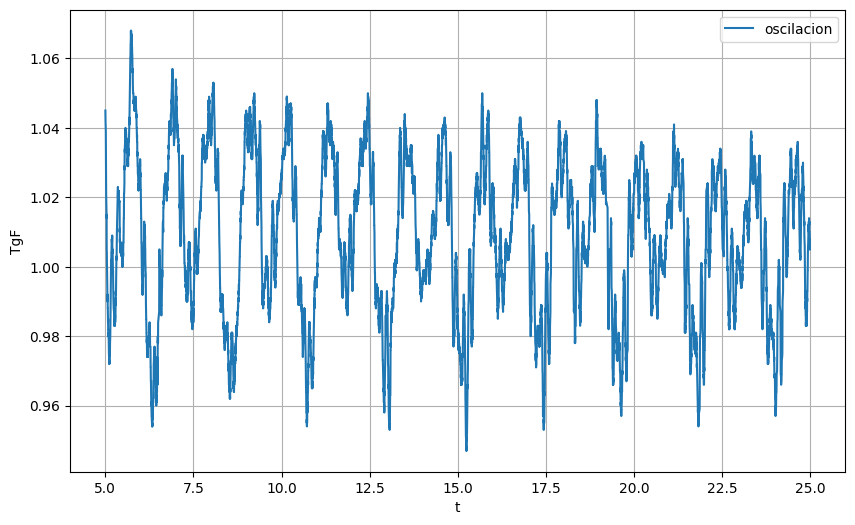

In [80]:
fig = plt.figure(figsize=(10,6)) #creo un objeto figura
ax = fig.add_subplot(111) #creo un subplot de 1x1
ax.plot(tiempo_lim,fuerza_tot_lim, label="Datos")
ax.set_xlabel("t")
ax.set_ylabel("TgF")
#ax.set_xticks(np.arange(0, 50, 5)) #agrego mas subdivisiones a lo pantalla
ax.legend()
ax.grid()

## Ajuste de datos mediante una curva

In [81]:
from scipy.optimize import curve_fit

In [188]:
#defino la función a ajustar
def f_sin(t,a,b,c,d):
    return a*np.sin(t*b+c)+d #a simple vista será una sinusoidal

In [226]:
#aplico  el ajuste no lineal con la función f_sin
popt, pcov =curve_fit(f_sin,tiempo_lim, fuerza_tot_lim,(0.5,6,0.5,0.5)) #los parametros estaran en popt

curva_ajust = f_sin(tiempo_lim, *popt)

Estuve como tres horas jugando con las estimaciones iniciales (ayudar a converger mas rapido los valores de los parametros del modelo que estoy ajustando)

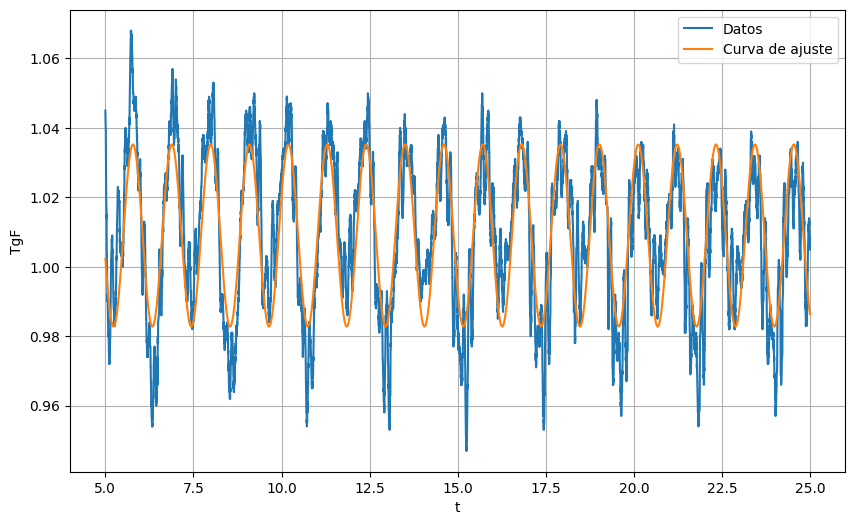

In [227]:
fig = plt.figure(figsize=(10,6)) #creo un objeto figura
ax = fig.add_subplot(111) #creo un subplot de 1x1
ax.plot(tiempo_lim,fuerza_tot_lim, label="Datos")
ax.plot(tiempo_lim,curva_ajust, label="Curva de ajuste")
ax.set_xlabel("t")
ax.set_ylabel("TgF")
#ax.set_xticks(np.arange(0, 50, 5)) #agrego mas subdivisiones a lo pantalla
ax.legend()
ax.grid()

In [238]:
#obtengo la frecuencia de oscilación
frec = popt[1]
frec

5.695013131288236

## Calculo de la longitud de la cinta

$$w = \sqrt({g\over l})$$

$$l = g/w^2$$

In [252]:
g = 9.8 #aceleración de la gravedad
l = g/(frec*0.5)**2
print(f"La longitu de la cinta es: {l: .2f} m")

La longitu de la cinta es:  1.21 m


ni idea porque multiplique la frecuencia por 0.5, pero el resultado da